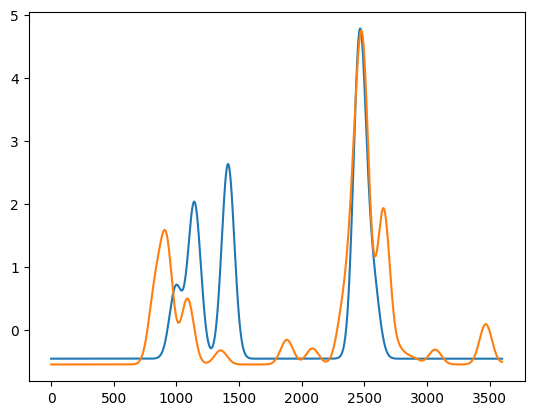

In [3]:
import numpy as np
import matplotlib.pyplot as plt

dat=np.load('timewarp.npy')
plt.plot(dat.T)

In [4]:
print(dat.shape)

(2, 3600)


In [5]:
distance_matrix=np.zeros((dat.shape[1],dat.shape[1]))

In [8]:
for i in range(dat.shape[1]):
    for j in range(dat.shape[1]):
        distance_matrix[i,j]=np.abs(dat[0,i]-dat[1,j])

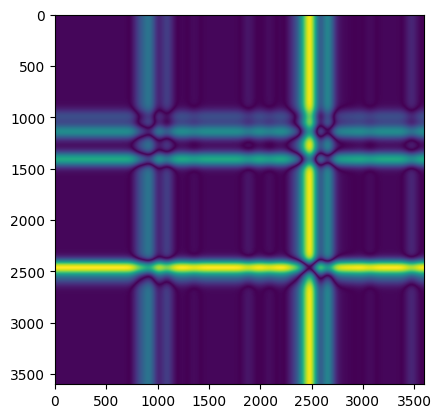

In [10]:
plt.imshow(distance_matrix)

In [12]:
import numpy as np

def dynamic_time_warping(ts1, ts2):
    """
    Perform Dynamic Time Warping (DTW) between two time series.
    
    Parameters:
        ts1, ts2: Arrays representing the two time series.
        
    Returns:
        dtw_matrix: The DTW cost matrix.
        dist: The DTW distance (minimal warping cost).
        path: The optimal warping path.
    """
    n, m = len(ts1), len(ts2)
    
    # Initialize the cost matrix with large values
    dtw_matrix = np.full((n+1, m+1), np.inf)
    
    # The starting point of the DTW cost matrix is zero
    dtw_matrix[0, 0] = 0

    # Compute the cumulative cost matrix
    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = abs(ts1[i-1] - ts2[j-1])
            dtw_matrix[i, j] = cost + min(dtw_matrix[i-1, j],    # Insertion
                                          dtw_matrix[i, j-1],    # Deletion
                                          dtw_matrix[i-1, j-1])  # Match
    
    # The DTW distance (minimum cost path)
    dist = dtw_matrix[n, m]

    # Backtrack to find the optimal warping path
    i, j = n, m
    path = [(i-1, j-1)]
    
    while i > 1 or j > 1:
        if i == 1:
            j -= 1
        elif j == 1:
            i -= 1
        else:
            # Move to the cell with the minimum cost
            steps = [dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]]
            argmin_step = np.argmin(steps)
            
            if argmin_step == 0:
                i -= 1
            elif argmin_step == 1:
                j -= 1
            else:
                i -= 1
                j -= 1
        
        path.append((i-1, j-1))
    
    # Reverse the path so that it goes from the beginning to the end
    path.reverse()

    return dtw_matrix, dist, path

# Example usage:
ts1 = dat[0,:]
ts2 = dat[1,:]
dtw_matrix, dist, path = dynamic_time_warping(ts1, ts2)

print("DTW Distance:", dist)
print("Warping Path:", path)

DTW Distance: 508.40768289445487
Warping Path: [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19), (20, 20), (21, 21), (22, 22), (23, 23), (24, 24), (25, 25), (26, 26), (27, 27), (28, 28), (29, 29), (30, 30), (31, 31), (32, 32), (33, 33), (34, 34), (35, 35), (36, 36), (37, 37), (38, 38), (39, 39), (40, 40), (41, 41), (42, 42), (43, 43), (44, 44), (45, 45), (46, 46), (47, 47), (48, 48), (49, 49), (50, 50), (51, 51), (52, 52), (53, 53), (54, 54), (55, 55), (56, 56), (57, 57), (58, 58), (59, 59), (60, 60), (61, 61), (62, 62), (63, 63), (64, 64), (65, 65), (66, 66), (67, 67), (68, 68), (69, 69), (70, 70), (71, 71), (72, 72), (73, 73), (74, 74), (75, 75), (76, 76), (77, 77), (78, 78), (79, 79), (80, 80), (81, 81), (82, 82), (83, 83), (84, 84), (85, 85), (86, 86), (87, 87), (88, 88), (89, 89), (90, 90), (91, 91), (92, 92), (93, 93), (94, 94), (95, 95), (96, 96), (9

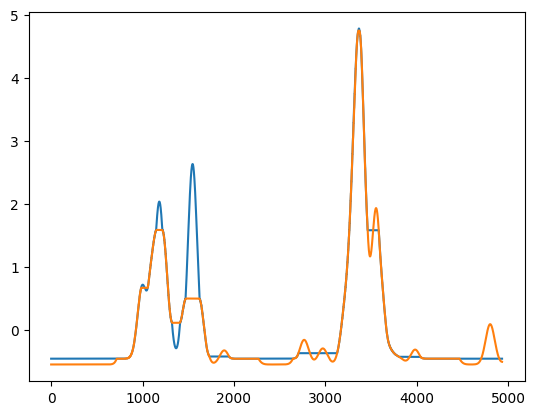

In [13]:
first=[x[0] for x in path]
second=[x[1] for x in path]

plt.plot(ts1[first])
plt.plot(ts2[second])

In [17]:
print(ts1[first].shape)
np.unique(first).shape

(4933,)


(3600,)